In [1]:
#Load Basic libraries
import numpy as np
import pandas as pd
import os
import cv2
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy
from scipy.stats import zscore

In [2]:
#Load Dataset
PATH = r'C:\Users\Pedro Vallarino\Desktop\Scripts\Python\Vision Artificial\Reconocer Formas\shapes'
shapes = ['circle', 'square','triangle', 'star']
labels = []
dataset = []

for shape in shapes:
    print('Getting Data for :', shape)
    for img in os.listdir(os.path.join(PATH, shape)):
        grayImage = cv2.imread(os.path.join(PATH,shape,img), cv2.IMREAD_GRAYSCALE)
        (thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 125, 255, cv2.THRESH_BINARY)
        contours, hierarchy = cv2.findContours(blackAndWhiteImage, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        
        
        #Calculate Moments
        moments = cv2.moments(contours[1])
        
        # Calculate Hu Moments
        huMoments = cv2.HuMoments(moments)
        
        # Log scale hu moments
        try:
        # Log scale hu moments
            for i in range(0,7):
                huMoments[i] = -1* math.copysign(1.0, huMoments[i]) * math.log10(abs(huMoments[i]))
        except Exception:
            pass
        
        huMoments = abs(huMoments)
        
        dataset.append(huMoments)
        
        #Add Label list
        labels.append(shapes.index(shape))



Getting Data for : circle
Getting Data for : square
Getting Data for : triangle
Getting Data for : star


In [3]:
display(dataset[0:2])
display(labels[0:2])

[array([[ 0.79785514],
        [ 4.87170351],
        [ 7.58494231],
        [10.26162068],
        [20.67945773],
        [12.80183174],
        [19.18512495]]), array([[ 0.79786844],
        [ 4.84564442],
        [ 7.3317326 ],
        [10.30416732],
        [19.15624004],
        [12.74390296],
        [19.54081033]])]

[0, 0]

In [4]:
for i in range(0,len(dataset)):
    dataset[i] = pd.DataFrame(dataset[i])
    dataset[i] = pd.DataFrame.transpose(dataset[i])

result = pd.concat(dataset)
result = result.reset_index()

result = result.drop(columns='index')

labels = pd.DataFrame(labels)

result.insert(7,"labels",labels)
result.columns = ['Hu1','Hu2','Hu3','Hu4','Hu5','Hu6','Hu7','labels']

print('\n','Dataset Total')
display(pd.DataFrame.head(result))



 Dataset Total


Hu1       Hu2       Hu3        Hu4        Hu5        Hu6        Hu7  \
0  0.797855  4.871704  7.584942  10.261621  20.679458  12.801832  19.185125   
1  0.797868  4.845644  7.331733  10.304167  19.156240  12.743903  19.540810   
2  0.797864  4.838065  6.629907   9.955211  18.413754  12.505186  18.383844   
3  0.797898  5.071954  6.239340  10.029308  19.085243  12.565377  18.166770   
4  0.768365  2.652744  3.640266   5.042419   9.383762   6.368791  16.823490   

   labels  
0       0  
1       0  
2       0  
3       0  
4       0

In [5]:
print('\n','Dataset Total')
display(pd.DataFrame.tail(result))



 Dataset Total


Hu1        Hu2           Hu3           Hu4           Hu5  \
14965  0.796249  25.656592  2.108709e+01  2.096040e+01  4.200428e+01   
14966  0.688132   1.838323  3.311610e+00  4.129594e+00  7.850477e+00   
14967  0.782516   2.760422  2.334782e+01  2.091722e+01  4.306656e+01   
14968  0.796249   0.000000  7.545785e-22  1.692982e-21  1.821742e-42   
14969  0.796249  25.656592  2.178185e+01  2.119311e+01  4.272353e+01   

             Hu6           Hu7  labels  
14965  33.899647  4.251052e+01       3  
14966   5.048855  9.293558e+00       3  
14967  22.499460  4.361351e+01       3  
14968   0.000000  5.854745e-43       3  
14969  34.072216  4.305360e+01       3

In [6]:
data = result[['Hu1','Hu2','Hu3','Hu4','Hu5','Hu6','Hu7']]
lbl = result[['labels']]

#Train Test Split
from sklearn.model_selection import train_test_split

#Split train and test set
x_train, x_test, y_train, y_test = train_test_split(data,lbl , test_size = 0.3, random_state = 7)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

10479
4491
10479
4491


# Modelos de Prediccion

### Logistic Regression

C:\Users\Pedro Vallarino\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pedro Vallarino\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pedro Vallarino\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression: 
               precision    recall  f1-score   support

           0       0.67      0.59      0.63      1260
           1       0.40      0.47      0.44       974
           2       0.68      0.84      0.75       898
           3       0.66      0.55      0.60      1359

    accuracy                           0.60      4491
   macro avg       0.61      0.62      0.61      4491
weighted avg       0.61      0.60      0.60      4491

Logistic Regression Accuracy:  0.6043197506123358


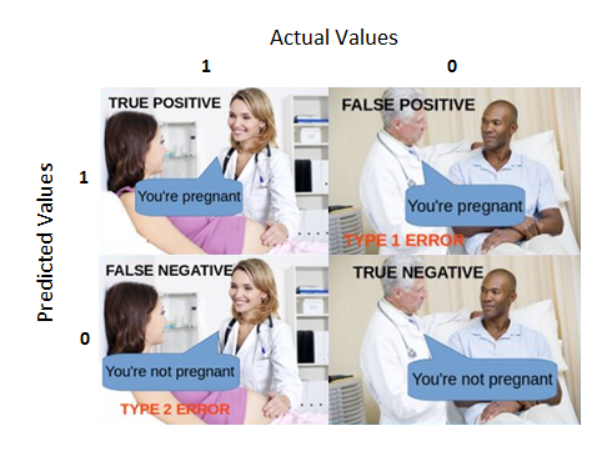

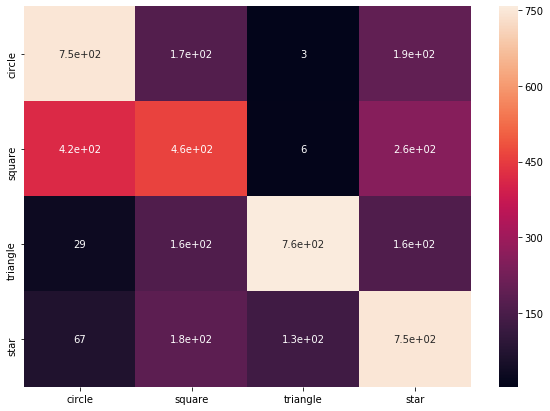

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.metrics import confusion_matrix
import seaborn as sn

modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

predictLR = modelLR.predict(x_test)
print('Logistic Regression: \n', classification_report(predictLR, y_test))
print('Logistic Regression Accuracy: ', accuracy_score(predictLR, y_test))

#precision : Basicamente la precision del modelo
#recall    : Cantidad de predicciones correctas sobre el total que tenia realmente ese valor
#f1-score  : Sirve para diferenciar los falsos positivos de los negativos
#support   : ---

#confusion matrix, en el eje x van los reales y en el eje y los que predice el algoritmo
conf_matrix = confusion_matrix(y_test, predictLR)
conf_matrix = pd.DataFrame(conf_matrix,index = ['circle','square','triangle','star'])
conf_matrix.columns = ['circle','square','triangle','star']
plt.figure(figsize = (10,7))
sn.heatmap(conf_matrix, annot=True)

from IPython.display import Image
Image(filename = 'Confusion Matrix.png', width = 400, height = 400 )   


### Random Forest 

C:\Users\Pedro Vallarino\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Pedro Vallarino\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      1052
           1       0.70      0.75      0.72      1064
           2       0.79      0.86      0.82      1020
           3       0.79      0.66      0.72      1355

    accuracy                           0.77      4491
   macro avg       0.77      0.77      0.77      4491
weighted avg       0.77      0.77      0.76      4491

Random Forest Classifier Accuracy:  0.7657537296815854


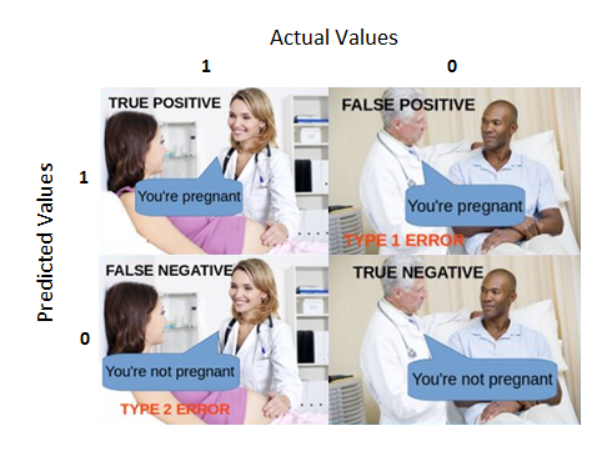

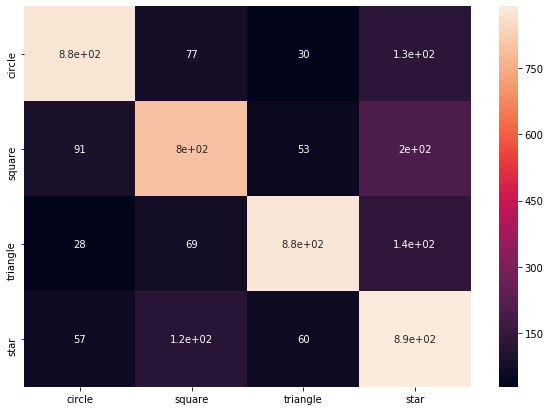

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.metrics import confusion_matrix
import seaborn as sn

modelRF = RandomForestClassifier()
modelRF.fit(x_train, y_train)

predictRF = modelRF.predict(x_test)
print('Random Forest Classifier : \n', classification_report(predictRF, y_test))
print('Random Forest Classifier Accuracy: ', accuracy_score(predictRF, y_test))

#confusion matrix, en el eje x van los reales y en el eje y los que predice el algoritmo
conf_matrix = confusion_matrix(y_test, predictRF)
conf_matrix = pd.DataFrame(conf_matrix,index = ['circle','square','triangle','star'])
conf_matrix.columns = ['circle','square','triangle','star']
plt.figure(figsize = (10,7))
sn.heatmap(conf_matrix, annot=True)

from IPython.display import Image
Image(filename = 'Confusion Matrix.png', width = 400, height = 400 )   


### Gradient Booster

C:\Users\Pedro Vallarino\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Classifier : 
               precision    recall  f1-score   support

           0       0.76      0.82      0.79      1023
           1       0.70      0.75      0.73      1063
           2       0.76      0.88      0.82       963
           3       0.80      0.63      0.70      1442

    accuracy                           0.76      4491
   macro avg       0.76      0.77      0.76      4491
weighted avg       0.76      0.76      0.75      4491

Gradient Boost Classifier Accuracy:  0.7552883544867512


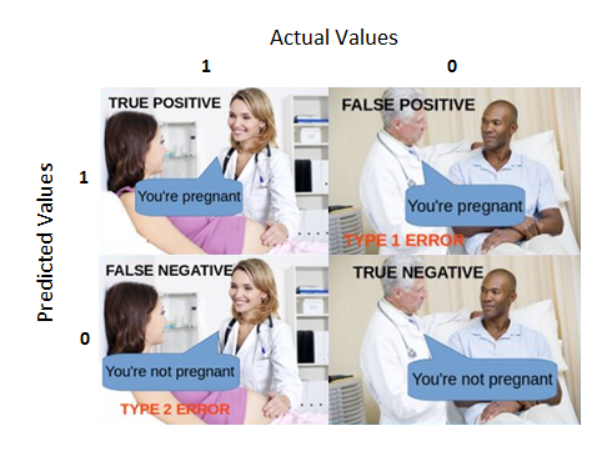

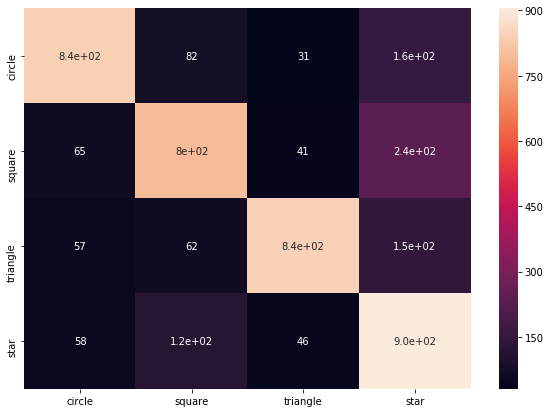

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.metrics import confusion_matrix
import seaborn as sn

modelGB = GradientBoostingClassifier()
modelGB.fit(x_train, y_train)

predictGB = modelGB.predict(x_test)
print('Gradient Boost Classifier : \n', classification_report(predictGB, y_test))
print('Gradient Boost Classifier Accuracy: ', accuracy_score(predictGB, y_test))

#confusion matrix, en el eje x van los reales y en el eje y los que predice el algoritmo
conf_matrix = confusion_matrix(y_test, predictGB)
conf_matrix = pd.DataFrame(conf_matrix,index = ['circle','square','triangle','star'])
conf_matrix.columns = ['circle','square','triangle','star']
plt.figure(figsize = (10,7))
sn.heatmap(conf_matrix, annot=True)

from IPython.display import Image
Image(filename = 'Confusion Matrix.png', width = 400, height = 400 )   


# Metodos de Prueba

### 1er Metodo

In [10]:
#Tratamiento de imagen que entra al sistema
import cv2
import numpy as np
import math

#Load Dataset
PATH = r'C:\Users\Pedro Vallarino\Desktop\Scripts\Python\Vision Artificial\Reconocer Formas\testing'
test_dataset = []
Imagenes_Reales = []
i = 0
    
for img in os.listdir(PATH):
    imagen_real = cv2.imread(os.path.join(PATH,img)) 
    grayImage = cv2.imread(os.path.join(PATH,img), cv2.IMREAD_GRAYSCALE)
                
    (thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 125, 255, cv2.THRESH_BINARY)
        
    contours, hierarchy = cv2.findContours(blackAndWhiteImage, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        
    cv2.drawContours(imagen_real, contours, -1, (0, 0, 255), 3)
    cv2.drawContours(imagen_real, contours[1], -1, (0, 255, 0), 3)
    cv2.imshow("Imagen Real B a W", blackAndWhiteImage)
    cv2.imshow("Imagen Real con Contorno", imagen_real)
    
    Imagenes_Reales.append(imagen_real)    
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()
        
    #Calculate Moments
    moments = cv2.moments(contours[1])
        
    # Calculate Hu Moments
    huMoments = cv2.HuMoments(moments)
        
    # Log scale hu moments
    try:
    # Log scale hu moments
        for i in range(0,7):
            huMoments[i] = -1* math.copysign(1.0, huMoments[i]) * math.log10(abs(huMoments[i]))
    except Exception:
        pass
        
    huMoments = abs(huMoments)
        
    test_dataset.append(huMoments)

In [11]:
print('\n','X_test','\n')
display(x_test.head())

for i in range(0,len(test_dataset)):
    test_dataset[i] = pd.DataFrame(test_dataset[i])
    test_dataset[i] = pd.DataFrame.transpose(test_dataset[i])

test_result = pd.concat(test_dataset)
test_result = test_result.reset_index()

test_result = test_result.drop(columns='index')

test_result.columns = ['Hu1','Hu2','Hu3','Hu4','Hu5','Hu6','Hu7']

print('Test Dataset')
display(pd.DataFrame(test_result))


 X_test 



Hu1       Hu2        Hu3        Hu4        Hu5        Hu6  \
6440   0.778151  2.760422  21.033545  21.067643  42.118251  22.456814   
12053  0.676726  3.855766   4.568218   5.785557  10.983595   8.580245   
14446  0.681612  3.487443   5.170360   5.394013  10.967551   7.137797   
10784  0.719386  3.628489   2.378980   5.025225   9.058999   7.137591   
12596  0.671665  3.248604   5.272819   5.665204  11.286431   7.617391   

             Hu7  
6440   44.220909  
12053  11.478644  
14446  10.741992  
10784   8.780473  
12596  11.283042

Test Dataset


Hu1        Hu2        Hu3        Hu4        Hu5        Hu6        Hu7
0   0.798108   5.562604   6.205970  10.401364  19.337508  13.580696  18.717161
1   0.777086   4.171652   5.161564   6.639005  12.551017   9.254127  13.178883
2   0.695397   3.941721   4.099048   6.181884  11.890878   8.529388  11.338796
3   0.716044   3.089709   2.372884   4.506028   7.980130   6.094644   8.361123
4   0.778151   2.760422  16.066675  16.230084  32.380144  17.662963  33.434848
5   0.778151   2.760422  18.694183  19.150855  38.126309  20.803123  38.405812
6   0.798133   5.769667   6.247871  10.512846  18.923714  13.459818  19.334446
7   0.340141   0.741776   2.643176   2.943109   5.743573   3.386215   6.475971
8   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000
9   0.778151  21.674160  15.451235  15.231931  30.589682  26.155762  31.145593
10  0.778151  21.437961  14.734986  14.743774  29.483169  25.468973  31.576122
11  0.778151  21.674160  15.383653  14.924530  30.092441  25.808832  30.683623
12  0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000
13  0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000
14  0.706123   2.044041   3.340247   4.121875   7.917027   5.415489   8.149172
15  0.662132   1.797743   2.595147   3.446191   6.479341   4.386710   7.093322
16  0.653213   1.908485   2.260668   3.658605   6.618241   4.612847  11.835086
17  0.778151  22.878280  16.993184  16.880833  33.859777  28.645357  34.195560
18  0.726900   6.453776   8.995367   9.740570  19.141011  13.104197  19.537192

In [12]:
for x in range(0,len(Imagenes_Reales)):
    
    predictRF = modelRF.predict(pd.DataFrame(test_result.loc[x,:]).T)

    if predictRF == 0:
        shape = 'Circulo'
    
    if predictRF == 1:
        shape = 'Cuadrado'
    
    if predictRF == 2:
        shape = 'Triangulo'
    
    if predictRF == 3:
        shape = 'Estrella'
    
    cv2.putText(Imagenes_Reales[x], 'La forma es ' + shape, (10,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,255), 2)
    cv2.imshow('Prueba',Imagenes_Reales[x])
    cv2.waitKey(0)
    cv2.destroyAllWindows()

### 2do Metodo

In [13]:
import cv2
import numpy as np
import pandas as pd
from math import sqrt, copysign, log10

HU = []

def show_webcam(mirror=False):
    cam = cv2.VideoCapture(0)
    cv2.namedWindow('My Web Cam')
    cv2.namedWindow('Original')
    cv2.createTrackbar('Threshold', 'My Web Cam', 120, 255, no_op)
    cv2.createTrackbar('Erosionado', 'My Web Cam', 0, 10, no_op)
    cv2.createTrackbar('Area MAX', 'My Web Cam', 100000, 100000, no_op)
    cv2.createTrackbar('Area MIN', 'My Web Cam', 1900, 10000, no_op)
    font=cv2.FONT_HERSHEY_SIMPLEX
    while True:
        ret_val, img = cam.read()
        if mirror: 
            img = cv2.flip(img, 1)
            #Convierto foto a escala de grises
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            #Obtengo la posición del treshold            
            x = int(cv2.getTrackbarPos('Threshold', 'My Web Cam'))
            #Convierto foto a binaria            
            (t, bwim) = cv2.threshold(gray, x, 255, cv2.THRESH_BINARY)
            y = int(cv2.getTrackbarPos('Erosionado', 'My Web Cam'))
            #Ignora los cuadrados menores a tal numero(se oobtiene en el trackbar)           
            kernel = np.ones((y,y), np.uint8)
            bwim = cv2.erode(bwim, kernel)
            #Indica el valor del thresh en la webcam (Esta demás, puede sacarlo)
            cv2.putText(img, str(x), (50,50), font, 1, (0, 0, 255))
            #ENCONTRAR CONTORNOS
            contours, hierarchy = cv2.findContours(bwim, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
            for cnt in contours:
                #Obtengo area del contorno
                area = cv2.contourArea(cnt)
                z= int(cv2.getTrackbarPos('Area MAX', 'My Web Cam'))
                z1= int(cv2.getTrackbarPos('Area MIN', 'My Web Cam'))
                #Limito el area del contorno para que no los dibuje todos               
                if z1 < area < z: #"reducir" la cantidad de contornos que dibuja
                    approx = cv2.approxPolyDP(cnt, 0.03*cv2.arcLength(cnt, True), True)
                    #print(len(approx)) # printea los lados de la figura en la consola
                    cv2.drawContours(img, cnt, -1, (0,0,255), 5)
                    
                    
                    
                    
                    k = cv2.waitKey(1) & 0xFF
                    if k == ord('q'):
                        HU = []
                        moments = cv2.moments(cnt)
                        humoments = cv2.HuMoments(moments)
                    
                    
                    
                    
                        for i in range(7):
                            #print(humoments[i])
                            HU.append(humoments[i])
                        #print(HU)
                        for num in range(0,7):
                            HU[num] = -1 * copysign(1.0, HU[num]) * log10(abs(HU[num]))
                        
                        HU = pd.DataFrame(HU)
                        HU = pd.DataFrame.transpose(HU)
                        HU.columns = ['Hu1','Hu2','Hu3','Hu4','Hu5','Hu6','Hu7']
                        display(HU)
                        
                        predictRF = modelRF.predict(HU)

                        if predictRF == 0:
                            shape = 'Circulo'
    
                        if predictRF == 1:
                            shape = 'Cuadrado'
    
                        if predictRF == 2:
                            shape = 'Triangulo'
    
                        if predictRF == 3:
                            shape = 'Estrella'
    
                        cv2.putText(img, 'La forma es ' + shape, (10,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,255), 2)
                        cv2.imshow('Prueba',img)
                        cv2.waitKey(0)
                        cv2.destroyWindow('Prueba')
     
        cv2.imshow('My Web Cam', bwim)
        cv2.imshow('Original', img)
        if cv2.waitKey(1) == 27: 
            break  # esc to quit
    cv2.destroyAllWindows()

def no_op(new_val):
    pass

def main():
    show_webcam(mirror=True)


if __name__ == '__main__':
    main()

Hu1       Hu2       Hu3       Hu4        Hu5       Hu6        Hu7
0  0.760968  2.503244  4.541312  5.588805  10.961699  7.332393 -10.714111

Hu1      Hu2       Hu3       Hu4       Hu5       Hu6       Hu7
0  0.666731  1.90342  2.533477  3.419339  6.663062  4.728917  6.470728

Hu1       Hu2       Hu3       Hu4       Hu5       Hu6       Hu7
0  0.69982  1.911596  3.242354  4.642026 -9.000372 -5.835392  8.618773